# LOGISITIC REGRESSION FROM SCRATCH

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=100, n_features=2, n_informative=1,n_redundant=0,
                           n_classes=2, n_clusters_per_class=1, random_state=41,hypercube=False,class_sep=10)

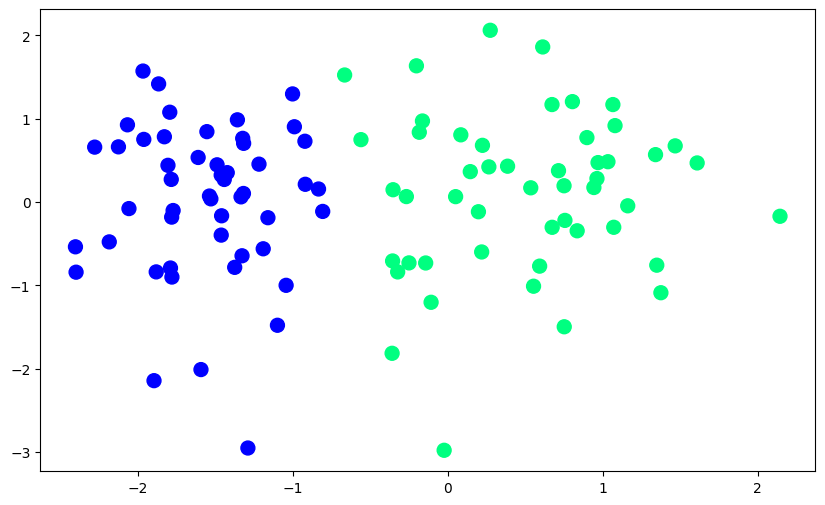

In [4]:
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)

In [5]:
from sklearn.linear_model import LogisticRegression

In [6]:
lor=LogisticRegression()

In [52]:
class Logistic:
    def __init__(self,lr,iter,lam):
        self.lr=lr
        self.n_iters =iter
        self.lam =lam
        self.W = 0
        self.b = 0

    def init2(self,X):
        self.W = np.zeros(X.shape[1])
        self.b = 0


    def sigmoid(self,Z):
        return 1/(1+np.exp(-Z))
    
    
    # def visual(self,cost,iter):
    #     plt.plot(iter,cost)

    def gradientD(self,pred,X,Y):
        m = X.shape[0]
        dz=pred-Y
        self.dw = (1 /m) * (np.dot(X.T, dz)+self.lam*self.W)
        self.db = (1 /m) * np.sum(dz)

    def pred(self,Xtest):
        A=self.step(Xtest)
        return np.round(A)

    def step(self,X):
        Z = np.matmul(X, self.W) + self.b
        A = self.sigmoid(Z)
        return A
    
    def fit(self,X,y):
        self.init2(X)
        costs=[]
        iterations = list(range(self.n_iters))
        for i in range(self.n_iters):
            pred=self.step(X)
            cost=self.cost(pred,y)
            costs.append(cost)
            self.gradientD(pred,X,y)

            self.W = self.W - self.lr* self.dw
            self.b = self.b - self.lr* self.db
        
        plt.plot(iterations, costs)
        plt.xlabel("Iterations")
        plt.ylabel("Cost")
        plt.title("Cost Function Over Time")
        plt.show()
            
    def cost(self,pred,y):
        m = y.shape[0]
        cost = np.sum((-np.log(pred + 1e-8) * y) + (-np.log(1 - pred + 1e-8)) * (
                1 - y))
        cost = cost / m
        return cost

In [41]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=.25)

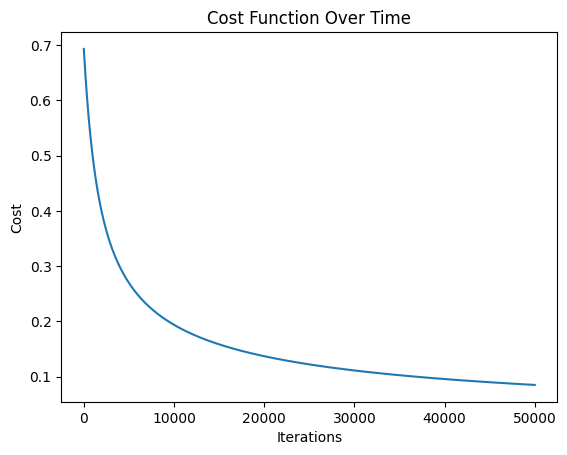

Test accuracy: 0.960
Precision: 1.000
Sensitivity/Recall: 0.929
F1 Score: 0.963
Confusion Matrix:
 [[11  0]
 [ 1 13]]


In [54]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

regressor = Logistic(.001,50000,0)
regressor.fit(xtrain,ytrain)
predictions = regressor.pred(xtest)  
cm = confusion_matrix(ytest, predictions)
accuracy = accuracy_score(ytest, predictions)
precision = precision_score(ytest, predictions)
sensitivity = recall_score(ytest, predictions)
f_score = f1_score(ytest, predictions)

print("Test accuracy: {0:.3f}".format(accuracy))
print("Precision: {0:.3f}".format(precision))
print("Sensitivity/Recall: {0:.3f}".format(sensitivity))
print("F1 Score: {0:.3f}".format(f_score))
print("Confusion Matrix:\n", cm)

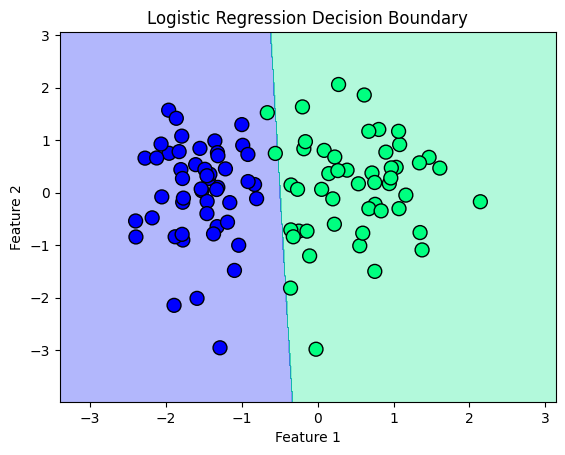

In [55]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Get predictions for every point on the grid
grid_points = np.c_[xx.ravel(), yy.ravel()]
Z = regressor.pred(grid_points)
Z = Z.reshape(xx.shape)

# Plot the decision boundary (the colored background)
plt.contourf(xx, yy, Z, alpha=0.3, cmap='winter')

# Plot the original data points on top
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='winter', s=100, edgecolors='k')

plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Logistic Regression Decision Boundary")
plt.show()